In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import imgkit
file_name = 'TimeFairGAN_Synthetic_with_fairness_Robot_300000_100'
command = 'no'
real_data = pd.read_csv(file_name+'.csv')
sensitive_id = 'Region'
Target_id = 'Failure'
G1 = 'Urban'
G2 = 'Rural'

In [8]:
real_data.head()

,Robot_ID,Region,Motor_Temperature,Vibration_Level,Power_Consumption,Failure
0,Robot_3,Urban,49.610256,0.101607,10.894798,No
1,Robot_3,Urban,49.749763,0.100396,13.455324,No
2,Robot_2,Urban,50.649498,0.101240,16.075914,No
3,Robot_1,Rural,49.541520,0.099711,16.242552,No
4,Robot_3,Urban,48.087772,0.112249,10.861646,Yes


In [3]:
real_data[sensitive_id] = real_data[sensitive_id].map({G1: 0, G2: 1})
real_data[Target_id] = real_data[Target_id].map({'No': 0, 'Yes': 1})
pivot_sensitive = pd.pivot_table(real_data,values=Target_id, index = sensitive_id, aggfunc=['sum', 'count'])
pivot_sensitive['sum']/pivot_sensitive['count']

,Failure
Region,
0,0.185085
1,0.394444


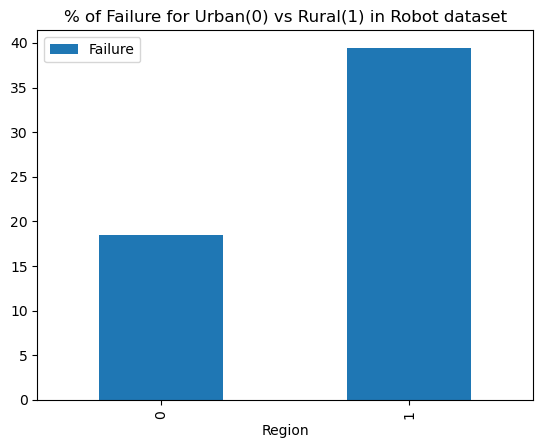

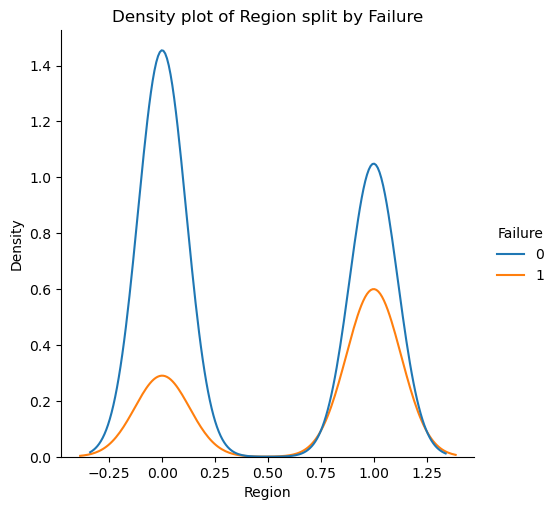

In [4]:
bar_plot = (pivot_sensitive['sum']/pivot_sensitive['count']*100).plot.bar(title=f'% of {Target_id} for {G1}(0) vs {G2}(1) in '+file_name+' dataset')
bar_plot.get_figure().savefig('Bar_plot_'+file_name+'.png')
density_plot = sns.displot(real_data, x=sensitive_id, hue=Target_id, kind="kde")
density_plot.set(title=f'Density plot of {sensitive_id} split by {Target_id}')
density_plot.savefig('Density_plot_'+file_name+'.png')

In [23]:
synthetic_data = pd.read_csv('.csv')
command = 'with'
itr = '50000'
lamda = '100'
synthetic_data.head()

,Robot_ID,Region,Motor_Temperature,Vibration_Level,Power_Consumption,Failure
0,Robot_1,Rural,48.743484,0.160111,14.330543,Yes
1,Robot_2,Urban,44.084324,0.129974,10.004478,No
2,Robot_3,Urban,52.135647,0.097012,10.081798,No
3,Robot_1,Rural,48.743584,0.160111,14.332890,Yes
4,Robot_2,Urban,44.085297,0.129963,10.004479,No


In [24]:
synthetic_data[sensitive_id] = synthetic_data[sensitive_id].map({G1: 0, G2: 1})
synthetic_data[Target_id] = synthetic_data[Target_id].map({'No': 0, 'Yes': 1})
pivot_sensitive_synthetic = pd.pivot_table(synthetic_data,values=Target_id, index = sensitive_id, aggfunc=['sum', 'count'])
pivot_sensitive_synthetic['sum']/pivot_sensitive_synthetic['count']

,Failure
Region,
0,0.030711
1,0.533670


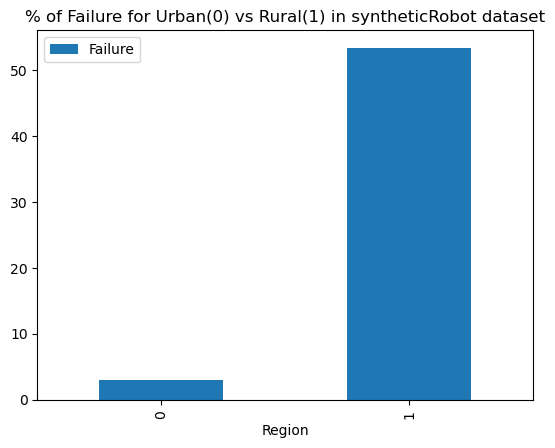

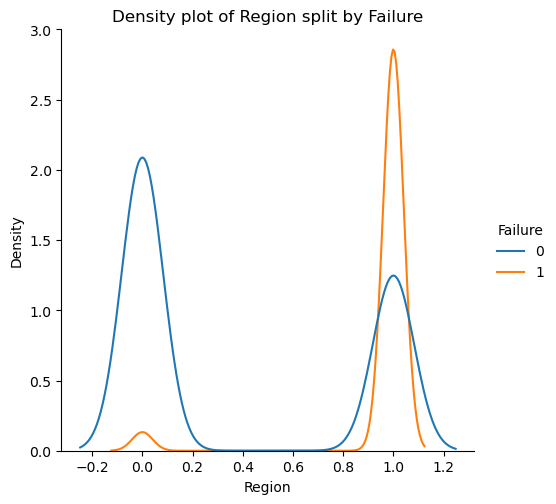

In [25]:
bar_plot_synthetic = (pivot_sensitive_synthetic['sum']/pivot_sensitive_synthetic['count']*100).plot.bar(title=f'% of {Target_id} for {G1}(0) vs {G2}(1) in synthetic'+file_name+' dataset')
bar_plot_synthetic.get_figure().savefig('Bar_plot_synthetic_'+file_name+'_'+itr+'_'+command+'.png')
density_plot_synthetic = sns.displot(synthetic_data, x=sensitive_id, hue=Target_id, kind="kde")
density_plot_synthetic.set(title=f'Density plot of {sensitive_id} split by {Target_id}')
density_plot_synthetic.savefig('Density_plot_synthetic_'+file_name+'_'+itr+'_'+lamda+'_'+command+'.png')